In [2]:
from sklearn.metrics import accuracy_score

In [9]:
def accuracy(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    sum = 0
    for yt, yp in zip(y_true, y_pred):
        sum += int(yt == yp)
    return sum/len(y_true)

In [10]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(accuracy(l1,l2))
print(accuracy_score(l1,l2))

0.625
0.625


In [24]:
def true_positive(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    res = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            res += 1
    return res

def true_negative(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    res = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            res += 1
    return res

def false_positive(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    res = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            res += 1
    return res

def false_negative(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    res = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            res += 1
    return res

In [25]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(true_positive(l1,l2),false_positive(l1,l2),false_negative(l1,l2),true_negative(l1,l2))

2 1 2 3


In [26]:
def accuracy_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return (tp+tn)/(tp+tn+fp+fn)

In [27]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(accuracy(l1,l2))
print(accuracy_score(l1,l2))
print(accuracy_v2(l1,l2))

0.625
0.625
0.625


In [30]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    return tp/(tp+fp)

print(precision(l1,l2))

0.6666666666666666


In [31]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return tp/(tp+fn)

print(recall(l1,l2))

0.5


In [32]:
def f1(y_true, y_pred):
    p = precision(y_true,y_pred)
    r = recall(y_true,y_pred)
    return (2*p*r)/(p+r)

print(f1(l1,l2))

0.5714285714285715


In [33]:
from sklearn.metrics import f1_score

print(f1_score(l1,l2))

0.5714285714285715


In [39]:
def tpr(y_true, y_pred):
    """
    陽性者の中で陽性と判定した割合
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return tp/(tp+fn)

def fpr(y_true, y_pred):
    """
    陰性者の中で陽性と判定した割合
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp/(tn+fp)

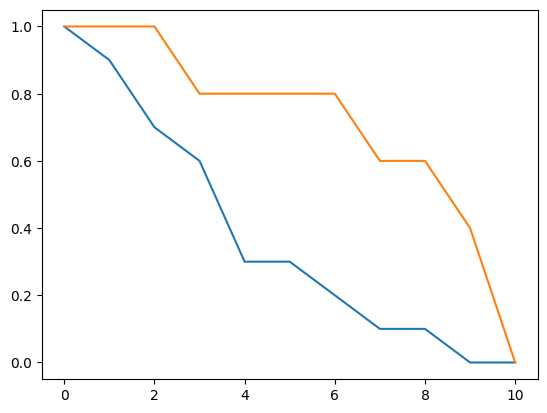

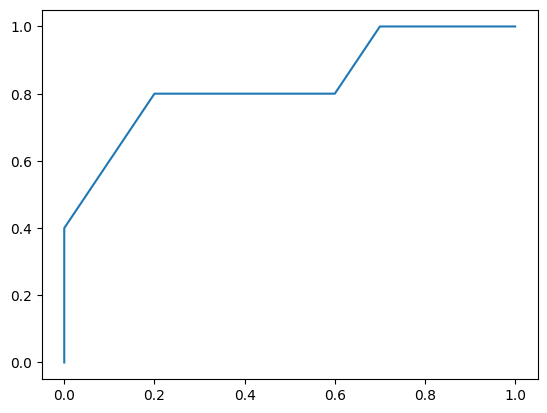

In [40]:
import matplotlib.pyplot as plt

tpr_list = []
fpr_list = []

y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_prob = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for th in thresholds:
    y_pred = [ 1 if y >= th else 0 for y in y_prob ]
    tpr_list.append(tpr(y_true,y_pred))
    fpr_list.append(fpr(y_true,y_pred))

plt.plot(fpr_list)
plt.plot(tpr_list)
plt.show()

plt.plot(fpr_list,tpr_list)
plt.show()

In [43]:
import numpy as np
from sklearn import metrics

y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_prob = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

def log_loss(y_true, y_pred):
    epsilon = 1e-15
    losses = []
    for yt, yp in zip(y_true, y_pred):
        loss = -1.*(
            yt*np.log(yp+epsilon)
            +(1-yt)*np.log(1-yp+epsilon)
        )
        losses.append(loss)
    return np.mean(losses)

print(log_loss(y_true,y_prob))
print(metrics.log_loss(y_true,y_prob))

0.4988271186143209
0.49882711861432294


In [56]:
def macro_precision(y_true,y_pred):
    num_class = len(np.unique(y_true))

    res = 0
    for class_ in range(num_class):
        tmp_true = [1 if y == class_ else 0 for y in y_true]
        tmp_pred = [1 if y == class_ else 0 for y in y_pred]
        tp = true_positive(tmp_true,tmp_pred)
        fp = false_positive(tmp_true,tmp_pred)
        res += (tp/(tp+fp))
    
    res /= num_class
    return res

def micro_precision(y_true,y_pred):
    num_class = len(np.unique(y_true))

    tp_sum = 0
    fp_sum = 0

    for class_ in range(num_class):
        tmp_true = [1 if y == class_ else 0 for y in y_true]
        tmp_pred = [1 if y == class_ else 0 for y in y_pred]
        tp = true_positive(tmp_true,tmp_pred)
        fp = false_positive(tmp_true,tmp_pred)
        tp_sum += tp
        fp_sum += fp

    return tp_sum/(tp_sum+fp_sum)

from collections import Counter

def weighted_precision(y_true,y_pred):
    num_class = len(np.unique(y_true))
    class2conunt = Counter(y_true)
    precision = 0

    for class_ in range(num_class):
        tmp_true = [1 if y == class_ else 0 for y in y_true]
        tmp_pred = [1 if y == class_ else 0 for y in y_pred]
        tp = true_positive(tmp_true,tmp_pred)
        fp = false_positive(tmp_true,tmp_pred)
        tmp_precision = tp/(tp+fp)
        tmp_precision *= class2conunt[class_]
        precision += tmp_precision
    
    precision /= len(y_true)
    return precision

In [57]:
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

print(macro_precision(y_true,y_pred))
print(metrics.precision_score(y_true,y_pred,average="macro"))
print(micro_precision(y_true,y_pred))
print(metrics.precision_score(y_true,y_pred,average="micro"))
print(weighted_precision(y_true,y_pred))
print(metrics.precision_score(y_true,y_pred,average="weighted"))

0.3611111111111111
0.3611111111111111
0.4444444444444444
0.4444444444444444
0.39814814814814814
0.39814814814814814


In [60]:
def weighted_f1(y_true,y_pred):
    num_class = len(np.unique(y_true))
    class2conunt = Counter(y_true)
    res = 0

    for class_ in range(num_class):
        tmp_true = [1 if y == class_ else 0 for y in y_true]
        tmp_pred = [1 if y == class_ else 0 for y in y_pred]
        tp = true_positive(tmp_true,tmp_pred)
        fp = false_positive(tmp_true,tmp_pred)
        fn = false_negative(tmp_true,tmp_pred)
        tmp =(2*tp)/(2*tp+fp+fn)
        tmp *= class2conunt[class_]
        res += tmp
    
    res /= len(y_true)
    return res

In [61]:
print(weighted_f1(y_true,y_pred))
print(metrics.f1_score(y_true,y_pred,average="weighted"))

0.4126984126984127
0.41269841269841273


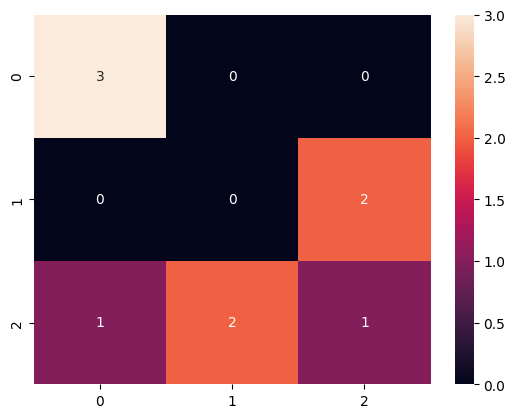

In [63]:
import seaborn as sns

cm = metrics.confusion_matrix(y_true,y_pred)

sns.heatmap(cm,annot=True)
plt.show()

In [69]:
def pk(y_true,y_pred,k):
    assert k > 0
    pred_set = set(y_pred[:k])
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values)/len(y_pred[:k])

def apk(y_true,y_pred,k):
    pk_vals = []
    for i in range(1,k+1):
        pk_vals.append(pk(y_true,y_pred,i))    
    return np.mean(pk_vals)

In [70]:
y_true = [
    [1,2,3],
    [0,2],
    [1],
    [2,3],
    [1,0],
    []    
]

y_pred = [
    [0,1,2],
    [1],
    [0,2,3],
    [2,3,4,0],
    [0,1,2],
    [0] 
]


for yt, yp in zip(y_true, y_pred):
    for k in range(1,4):
        print(yt,yp)
        print(k,apk(yt,yp,k))

[1, 2, 3] [0, 1, 2]
1 0.0
[1, 2, 3] [0, 1, 2]
2 0.25
[1, 2, 3] [0, 1, 2]
3 0.38888888888888884
[0, 2] [1]
1 0.0
[0, 2] [1]
2 0.0
[0, 2] [1]
3 0.0
[1] [0, 2, 3]
1 0.0
[1] [0, 2, 3]
2 0.0
[1] [0, 2, 3]
3 0.0
[2, 3] [2, 3, 4, 0]
1 1.0
[2, 3] [2, 3, 4, 0]
2 1.0
[2, 3] [2, 3, 4, 0]
3 0.8888888888888888
[1, 0] [0, 1, 2]
1 1.0
[1, 0] [0, 1, 2]
2 1.0
[1, 0] [0, 1, 2]
3 0.8888888888888888
[] [0]
1 0.0
[] [0]
2 0.0
[] [0]
3 0.0


In [71]:
def mapk(y_true,y_pred,k):
    apk_vals = []
    for yt, yp in zip(y_true, y_pred):
        apk_vals.append(apk(yt,yp,k))
    return np.mean(apk_vals)

for k in range(1,4):
    print(k,mapk(y_true,y_pred,k))

1 0.3333333333333333
2 0.375
3 0.3611111111111111
